In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.subplots as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')

/kaggle/input/supply-chain-optimization-for-a-fmcg-company/FMCG_data.csv
/kaggle/input/supply-chain-optimization-for-a-fmcg-company/Problem Statement.pdf


# FMCG Warehouse: Optimizing Distribution Efficiency

**Background:**
The company is facing challenges in ensuring efficient warehouse operations, resulting in frequent stockouts, delays in deliveries, and increased operational costs. The management has tasked you with analyzing the data from these warehouses to identify key issues and provide actionable insights to enhance warehouse efficiency.

**Problem Statement**
Problem Statement: FMCG is experiencing inefficiencies in its warehouse operations. These inefficiencies are affecting the supply chain, leading to stockouts, delivery delays, and increased costs. Your task is to analyze warehouse data to uncover the root causes of these issues and propose data-driven solutions to optimize warehouse performance.
Why is it Important to Solve? Addressing these inefficiencies is crucial for improving customer satisfaction, reducing operational costs, and ensuring timely delivery of products. Efficient warehouse operations are critical for maintaining a competitive edge in the retail market.


**Data Dictionary:**

1. Ware_house_ID: Unique identifier for each warehouse
2. WH_Manager_ID: Identifier for the warehouse manager
3. Location_type: Type of location (Urban/Rural)
4. WH_capacity_size: Size of warehouse capacity (Small/Mid/Large)
5. zone: Geographical zone of the warehouse
6. WH_regional_zone: Regional zone identifier
7. num_refill_req_l3m: Number of refill requests in the last 3 months
8. transport_issue_l1y: Number of transport issues in the last year
9. Competitor_in_mkt: Number of competitors in the market
10. retail_shop_num: Number of retail shops served by the warehouse
11. electric_supply: Availability of electric supply (1 = Yes, 0 = No)
12. dist_from_hub: Distance from central distribution hub (km)
13. workers_num: Number of workers in the warehouse
14. wh_est_year: Year of warehouse establishment
15. storage_issue_reported_l3m: Number of storage issues reported in the last 3 months
16. temp_reg_mach: Availability of temperature regulation machinery
17. approved_wh_govt_certificate: Type of government certification approved
18. wh_breakdown_l3m: Number of warehouse breakdowns in the last 3 months
19. govt_check_l3m: Number of government checks in the last 3 months
20. product_wg_ton: Weight of products stored (tons)



In [2]:
wh= pd.read_csv('/kaggle/input/supply-chain-optimization-for-a-fmcg-company/FMCG_data.csv')

In [3]:
wh

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [4]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
wh = wh.dropna(subset=['wh_est_year'])

In [6]:
pd.options.mode.copy_on_write = True

wh['wh_est_year'] = wh['wh_est_year'].astype(int)

In [7]:
wh.wh_est_year.unique()

array([2009, 2010, 2013, 1999, 2017, 2022, 2008, 2001, 2016, 1997, 2003,
       2006, 2019, 2015, 2012, 1998, 2021, 2004, 2000, 2005, 2011, 2014,
       1996, 2020, 2023, 2002, 2007, 2018])

In [8]:
wh.shape


(13119, 24)

In [9]:
wh.isna().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     538
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    473
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [10]:
wh.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,12581.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,5.486851,0.448815,3.112509,4986.216175,42.467337,0.096577,0.052824,0.651193,163.544173,28.850807,2009.383185,18.333333,0.398887,3.483040,18.791905,23915.513454
std,1.720691,0.906070,1.149449,1051.444496,16.104239,0.295393,0.223691,0.476611,62.480858,7.918509,7.528230,9.340444,0.489688,1.687329,8.610438,11810.371414
min,3.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,3062.000000
25%,4.000000,0.000000,2.000000,4320.000000,29.000000,0.000000,0.000000,0.000000,109.000000,23.000000,2003.000000,11.000000,0.000000,2.000000,11.000000,14127.000000
50%,5.000000,0.000000,3.000000,4860.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,19.000000,0.000000,3.000000,21.000000,24102.000000
75%,7.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,217.000000,33.000000,2016.000000,25.000000,1.000000,5.000000,26.000000,31129.000000
max,8.000000,4.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55150.000000


In [11]:
wh.select_dtypes(include='object').describe()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,13119,13119,13119,13119,13119,13119,13119,12646
unique,13119,13119,2,3,4,6,2,5
top,WH_100004,EID_50004,Rural,Large,North,Zone 6,Company Owned,C
freq,1,1,11994,5375,5403,4387,7090,2801


In [12]:
wh.WH_capacity_size.mode()

0    Large
Name: WH_capacity_size, dtype: object

**RECOMMENDED ANALYSIS**

**Q.1 What is the average capacity size of the warehouses?**

In [13]:
wh.WH_capacity_size.value_counts().reset_index()

,WH_capacity_size,count
0,Large,5375
1,Mid,5306
2,Small,2438


**Q.2 How many warehouses are located in urban areas versus rural areas?**

In [14]:
wh.Location_type.value_counts().reset_index()

,Location_type,count
0,Rural,11994
1,Urban,1125


**Q.3 What is the total number of retail shops served by each zone?**

In [15]:
wh.groupby('zone')['retail_shop_num'].sum().reset_index()

,zone,retail_shop_num
0,East,1076159
1,North,27298465
2,South,16304018
3,West,20735528


**Q.4 Calculate the average number of workers per warehouse.**

In [16]:
wh.groupby('WH_regional_zone')['workers_num'].mean().reset_index()

,WH_regional_zone,workers_num
0,Zone 1,28.793380
1,Zone 2,28.894737
2,Zone 3,29.130944
3,Zone 4,28.663721
4,Zone 5,28.804007
5,Zone 6,28.873484


In [17]:
wh.groupby('zone')['workers_num'].mean()

zone
East     29.125581
North    28.820726
South    28.888065
West     28.846229
Name: workers_num, dtype: float64

In [18]:
wh.groupby('WH_capacity_size')['workers_num'].mean()

WH_capacity_size
Large    28.792669
Mid      28.864450
Small    28.949189
Name: workers_num, dtype: float64

In [19]:
# Fill the nulls with the average no. of workers
wh['workers_num'] = wh['workers_num'].fillna(wh.groupby('WH_regional_zone')['workers_num'].transform('mean'))

In [20]:
wh.workers_num.isna().sum()

0

**Q.5 Determine the percentage of warehouses with electric supply.**

In [21]:
wh.electric_supply.value_counts()

electric_supply
1    8543
0    4576
Name: count, dtype: int64

In [22]:
total_warehouses = len(wh)

warehouses_with_electric_supply = wh['electric_supply'].sum()

percentage_with_electric_supply = (warehouses_with_electric_supply / total_warehouses) * 100

print(f"Percentage of warehouses with electric supply: {percentage_with_electric_supply:.2f}%")

Percentage of warehouses with electric supply: 65.12%


**Q.6 What is the average distance of warehouses from the central distribution hub?**

In [23]:
wh.groupby('zone')['dist_from_hub'].mean().reset_index()

,zone,dist_from_hub
0,East,167.757848
1,North,162.054414
2,South,165.168515
3,West,163.976689


In [24]:
wh.groupby(['zone', 'WH_regional_zone'])['dist_from_hub'].mean()

zone   WH_regional_zone
East   Zone 1              166.500000
       Zone 3              179.189655
       Zone 4              165.576923
       Zone 5              154.081081
       Zone 6              168.875000
North  Zone 1              161.187354
       Zone 2              163.822844
       Zone 3              158.683594
       Zone 4              163.462366
       Zone 5              160.123506
       Zone 6              163.045798
South  Zone 1              162.706061
       Zone 2              166.391188
       Zone 3              163.617450
       Zone 4              168.388646
       Zone 5              163.159930
       Zone 6              165.541126
West   Zone 1              164.337255
       Zone 2              159.045822
       Zone 3              164.136273
       Zone 4              164.065465
       Zone 5              167.437659
       Zone 6              163.074883
Name: dist_from_hub, dtype: float64

**Q.7 How many warehouses have reported storage issues in the last 3 months?**

In [25]:
# Total number of warehouses
total_warehouses = len(wh)

# Total number of warehouses with storage issues in the last 3 months
total_issues = wh['storage_issue_reported_l3m'].sum()

# Count of warehouses with storage issues by zone and regional zone
issues_by_zone = wh[wh['storage_issue_reported_l3m'] > 0].groupby('zone').size().reset_index(name='issues_count')
issues_by_regional_zone = wh[wh['storage_issue_reported_l3m'] > 0].groupby('WH_regional_zone').size().reset_index(name='issues_count')

print(f"Total warehouses: {total_warehouses}")
print(f"Total warehouses with storage issues: {total_issues}")

print("Issues by Zone:")
print(issues_by_zone)

print("\nIssues by Regional Zone:")
print(issues_by_regional_zone)

Total warehouses: 13119
Total warehouses with storage issues: 240515
Issues by Zone:
    zone  issues_count
0   East           220
1  North          5202
2  South          3120
3   West          4104

Issues by Regional Zone:
  WH_regional_zone  issues_count
0           Zone 1           980
1           Zone 2          1500
2           Zone 3          1461
3           Zone 4          2169
4           Zone 5          2318
5           Zone 6          4218


**Q.8 Identify the top 3 zones with the highest number of refill requests in the last 3 months.**

In [26]:
wh.groupby('WH_regional_zone')['num_refill_req_l3m'].sum().sort_values(ascending=False).head(3)

WH_regional_zone
Zone 6    24061
Zone 5    13190
Zone 4    12286
Name: num_refill_req_l3m, dtype: int64

**Q.9 Calculate the average number of government checks per warehouse in the last 3 months.**

In [27]:
wh.groupby(['zone','WH_regional_zone'])['govt_check_l3m'].mean()

zone   WH_regional_zone
East   Zone 1              27.666667
       Zone 3              27.000000
       Zone 4              26.000000
       Zone 5              14.000000
       Zone 6              15.000000
North  Zone 1              18.882904
       Zone 2              11.820513
       Zone 3              25.500000
       Zone 4              26.000000
       Zone 5              18.269920
       Zone 6              19.775630
South  Zone 1              20.339394
       Zone 2              24.185581
       Zone 3              21.362416
       Zone 4              23.019651
       Zone 5              17.089631
       Zone 6              14.854257
West   Zone 1              19.160784
       Zone 2               9.929919
       Zone 3              20.106212
       Zone 4              18.272296
       Zone 5              14.100509
       Zone 6              14.847114
Name: govt_check_l3m, dtype: float64

**Q.10 Determine the most common type of government certification among warehouses.**

In [28]:
wh.approved_wh_govt_certificate.value_counts()

approved_wh_govt_certificate
C     2801
B     2586
B+    2573
A     2459
A+    2227
Name: count, dtype: int64

# **Medium level**

**Q.1 What is the correlation between the number of workers and the number of reported storage issues in the last 3 months?**

In [29]:
correlation = wh['workers_num'].corr(wh['storage_issue_reported_l3m'])
print(f"The correlation between the number of workers and the number of reported storage issues is: {correlation}")

The correlation between the number of workers and the number of reported storage issues is: -0.000913066197778624


**Q.2 Analyze the relationship between warehouse capacity size and the number of refill requests in the last 3 months.**

In [30]:
wh.pivot_table(index='WH_capacity_size', columns='num_refill_req_l3m', values='Ware_house_ID', aggfunc='count')

num_refill_req_l3m,3,4,5,6,7,8
WH_capacity_size,,,,,,
Large,931,880,913,856,887,908
Mid,932,870,872,837,892,903
Small,402,419,415,407,390,405


**Q.3 Identify which geographical zone has the highest average number of transport issues in the last year.**

In [31]:
wh.groupby('zone')['transport_issue_l1y'].mean().round(decimals=2)

zone
East     0.47
North    0.47
South    0.43
West     0.43
Name: transport_issue_l1y, dtype: float64

**Q.4 Calculate the average product weight per ton for warehouses that have temperature regulation machinery.**

In [32]:
filtered_wh = wh[wh['temp_reg_mach']==1]
avg_weight = filtered_wh['product_wg_ton'].mean().round(decimals=2)
print('\nAverage product weight per ton for warehouses with temperature regulation machinery:', avg_weight)


Average product weight per ton for warehouses with temperature regulation machinery: 25428.15


**Q.5 Determine the top 5 warehouses with the highest number of government checks in the last 3 months and analyze their storage issue reports.**

In [33]:
wh.groupby('govt_check_l3m')['storage_issue_reported_l3m'].sum().sort_values(ascending=False).head().reset_index()

,govt_check_l3m,storage_issue_reported_l3m
0,26,28522
1,23,18678
2,19,15399
3,14,13901
4,28,13750


**Q.6 Compare the average number of workers in warehouses located in urban areas versus rural areas.**

In [34]:
wh.groupby('Location_type')['workers_num'].mean().round(decimals=2)

Location_type
Rural    28.86
Urban    28.73
Name: workers_num, dtype: float64

**Q.7 What is the impact of the distance from the hub on the number of transport issues reported?**

In [35]:
cor = wh['transport_issue_l1y'].corr(wh['dist_from_hub'])
print(cor)

fig = px.scatter(wh, x='transport_issue_l1y', y='dist_from_hub', size='dist_from_hub')
fig.show()

-0.004667275849114954


**Q.8 Analyze the effect of competitor presence in the market on the number of refill requests.**

In [36]:
wh.pivot_table(index='Competitor_in_mkt', columns='num_refill_req_l3m', values='Ware_house_ID', aggfunc='count')

num_refill_req_l3m,3,4,5,6,7,8
Competitor_in_mkt,,,,,,
0,NaN,NaN,NaN,NaN,1.0,NaN
1,39.0,40.0,32.0,36.0,38.0,33.0
2,802.0,777.0,719.0,710.0,766.0,760.0
3,634.0,589.0,647.0,580.0,615.0,641.0
4,599.0,589.0,617.0,598.0,576.0,581.0
5,117.0,97.0,112.0,98.0,95.0,126.0
6,45.0,51.0,52.0,56.0,48.0,44.0
7,18.0,20.0,14.0,16.0,18.0,17.0
8,9.0,6.0,6.0,6.0,8.0,10.0


In [37]:
wh.groupby('Competitor_in_mkt')['num_refill_req_l3m'].sum()

Competitor_in_mkt
0         7
1      1183
2     24811
3     20406
4     19506
5      3560
6      1623
7       562
8       253
9        33
10       30
12        8
Name: num_refill_req_l3m, dtype: int64

**Q.9 Determine if there is a significant difference in the number of storage issues reported between warehouses with and without government certificates.**

In [38]:
wh.pivot_table(index='storage_issue_reported_l3m', columns='approved_wh_govt_certificate', values='Ware_house_ID', aggfunc='count')

approved_wh_govt_certificate,A,A+,B,B+,C
storage_issue_reported_l3m,,,,,
4,31.0,NaN,61.0,74.0,147.0
5,100.0,41.0,148.0,133.0,243.0
6,93.0,43.0,96.0,101.0,169.0
7,28.0,4.0,39.0,55.0,86.0
8,8.0,4.0,50.0,50.0,94.0
9,83.0,78.0,104.0,74.0,86.0
10,74.0,71.0,70.0,37.0,68.0
11,84.0,83.0,76.0,41.0,81.0
12,73.0,81.0,80.0,45.0,71.0


In [39]:
wh.groupby('approved_wh_govt_certificate')['storage_issue_reported_l3m'].sum()

approved_wh_govt_certificate
A     48178
A+    47496
B     48217
B+    48771
C     47853
Name: storage_issue_reported_l3m, dtype: int64

**Q.10 Investigate the relationship between warehouse establishment year and the number of breakdowns reported in the last 3 months.**

<Figure size 1120x640 with 0 Axes>

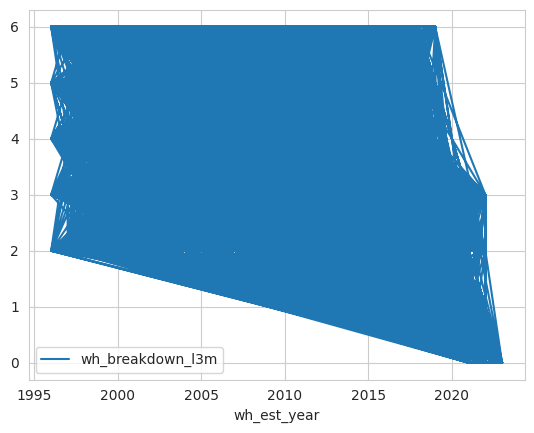

In [40]:
plt.figure(figsize=(14,8), dpi=80, frameon=True)
wh.plot(kind='line', x='wh_est_year', y='wh_breakdown_l3m')
plt.show()

In [41]:
wh.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [42]:
wh.isna().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    473
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64